<h1>Dilip <span style="color:blueviolet;font-family:sans-serif">Pokhrel</span></h1>

Neural  Network Image Classification with the Tensorflow and Keras

 A few types of classification problems:
 <ul>
 <li>Binary classification</li>
 <li>Multiclass classification</li>
 <li>Multiabel classification</li>
</ul>


In [1]:
from sklearn.datasets import make_circles
import tensorflow as tf

# make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)
# X[:,0] , y[:2]
y[:10]
# one and zero means whether they lies in the red circumference or blue circumference

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import pandas as pd
circles = pd.DataFrame({"XO":X[:,0], "Xl":X[:,1], 'label':y})
circles

,XO,Xl,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


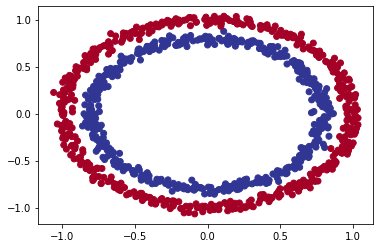

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
# Steps in modelling

# 1. Create or import the model
# 2. Compile the model
# 3. Fit the model
# 4. Evaluate the model
# 5. Tweak
# 6. Evaluate

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                             
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5320


[0.6931579113006592, 0.5320000052452087]

In [ ]:
import numpy as np

def plot_descision_boundary(model,X,y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


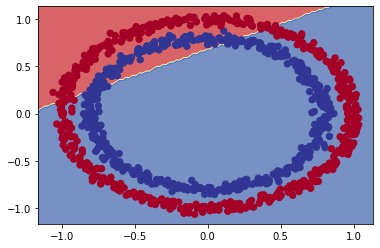

In [ ]:
# check out the predictions our model is making
plot_descision_boundary(model_1,
                        X,y)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" is short for "learning rate"
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


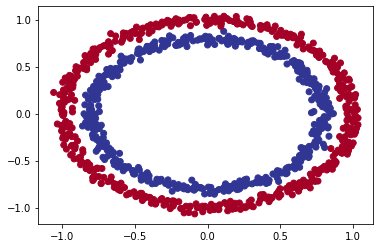

In [ ]:
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

doing binary classifcation...


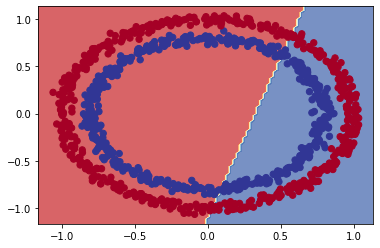

In [ ]:
# Check the decision boundary
plot_descision_boundary(model_4, X, y)

In [ ]:
# Lets choose another activation function which is non linear

tf.random.set_seed(42)

model_5 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history=model_5.fit(X,y, epochs=2000, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Evaluate the model
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.9950


[0.009872373193502426, 0.9950000047683716]

doing binary classifcation...


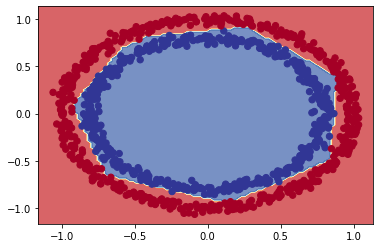

In [ ]:
# How do our model predictions look?
plot_descision_boundary(model_5, X, y)

In [ ]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

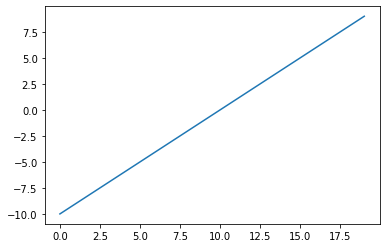

In [ ]:
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1/(1+tf.math.exp(-x))

# Use the sigmoid function in our toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

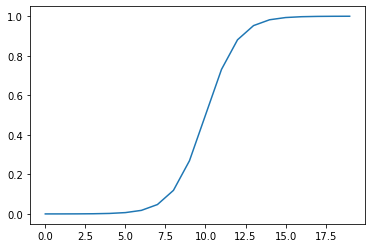

In [ ]:
plt.plot(sigmoid(A))

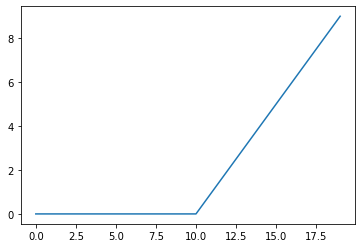

In [ ]:
#  Lets re-create the relu function
def relu(x):
  return tf.maximum(0, x)

plt.plot(relu(A))

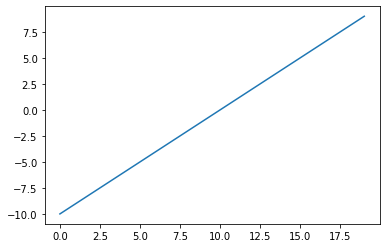

In [ ]:
# Lets try linear activation function
def linear(x):
  return tf.keras.activations.linear(x)

plt.plot(linear(A))

In [ ]:
# Evaluating and improving our classification
# actually so far we have been training and testing on our same data so lets make our training and test set.

# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]



In [ ]:
# Let's recreate a model to fid on train data
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_9.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics='Accuracy')

history=model_9.fit(X_train, y_train, epochs=250, verbose=0)

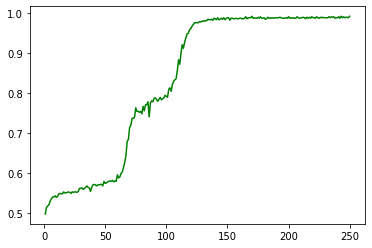

In [ ]:
# plot the Accuracy and epochs 
epochs = range(1,251)
plt.plot(epochs, history.history['Accuracy'], 'g', label='Training loss')

Text(0.5, 1.0, 'Model accuracy loss curves')

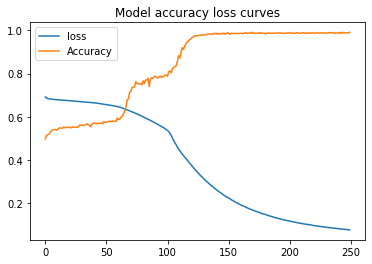

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model accuracy loss curves")

In [ ]:
# Finding the best learning rate

# to find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
# A learning rate **Callback** you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
# Another model (we could use the same one as above, but we're practicing the building models here)
# A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

#Create a model (same as above)
model_10= tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model 
model_10.compile(loss='binary_crossentropy',
                 optimizer='Adam',
                 metrics="Accuracy")

# Create  a learning rate callback this weired lambda function is for learning rate rate range.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20)) # nge

history_10 = model_10.fit(X_train,
                          y_train,
                          epochs=100,
                          callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - Accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - Accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - Accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - Accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - Accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - Accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - Accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - Accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

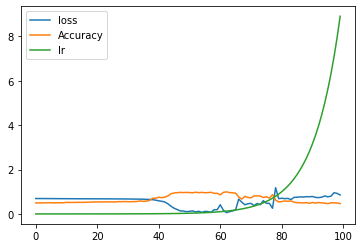

In [ ]:
# let's plot the accuracy, learning, and the loss curve

pd.DataFrame(history_10.history).plot()

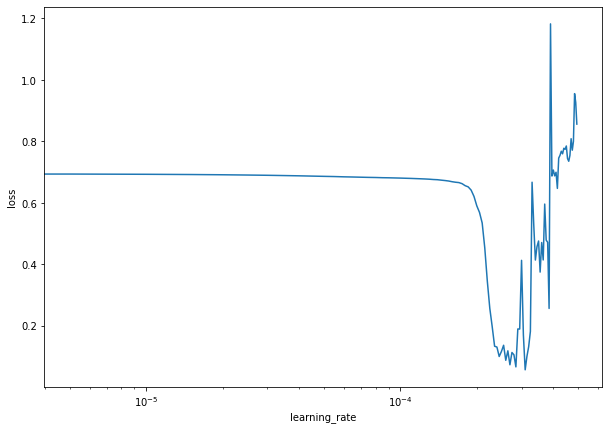

In [ ]:
lrs = 1e-4 * (tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_10.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.show()

In [ ]:
# let's try best learning rate possible after seeing the curve
tf.random.set_seed(42)

model_11= tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_11.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001) ,metrics=['Accuracy'])

history=model_11.fit(X_train, y_train, epochs=250)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - Accuracy: 0.4975
Epoch 2/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - Accuracy: 0.5138
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6846 - Accuracy: 0.5175
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - Accuracy: 0.5200
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6823 - Accuracy: 0.5300
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6816 - Accuracy: 0.5350
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6810 - Accuracy: 0.5400
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6805 - Accuracy: 0.5400
Epoch 9/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - Accuracy: 0.5425
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6795 - Accuracy: 0.5387
Epoch 11/

doing binary classifcation...
doing binary classifcation...


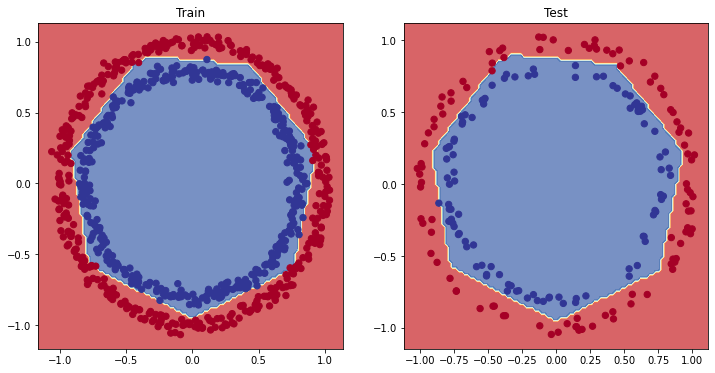

In [ ]:
# Plot the desision boundary for the training and the test sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # graph going to show in one row and two columns and the first graph is going to be Train graph
plt.title("Train")
plot_descision_boundary(model_11, X=X_train, y=y_train)

plt.subplot(1,2,2)  # graph going to show in one row and two columns and the second graph is going to be Test graph
plt.title('Test')
plot_descision_boundary(model_11, X=X_test, y=y_test)
plt.show()

In [ ]:
# # More classification evaluation matrix
# 1. Accuracy
# 2. Precision
# 3. Recall
# 4. F1-Score
# 5. Confusion matrix
# 6. Classification report

In [ ]:
# Check the accuracy of our model
loss ,accuracy = model_11.evaluate(X_test, y_test)
loss

7/7 [==============================] - 0s 2ms/step - loss: 0.0645 - Accuracy: 0.9900


0.06450109928846359

In [ ]:
# How about the confusion matrix?
from sklearn.metrics import confusion_matrix
y_pred = model_11.predict(X_test)
y_pred = tf.round(y_pred)
cm=confusion_matrix(y_test, y_pred)

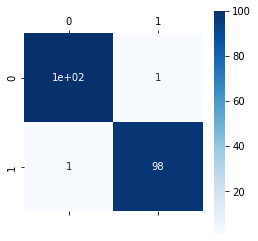

In [ ]:
import seaborn as sn
plt.matshow(cm, cmap='binary')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues)

In [ ]:
# # Working with a larger example (multiclass classification)
# When you have more than 2 classes as an option or output, it's known as multiclass classification
# let's say you have 100 different classes then it is multiclass classification

# To practice multiclass classification
# we're going to build a neural network 

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.image as mpimg

# The data has already been sorted into training and test sets for us 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Show the first training example
print(f'Training sample: \n {train_data[0]}\n')
print(f'Training label: \n {train_labels[0]}\n')

# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

4431872/4422102 [==============================] - 0s 0us/step
Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146

((28, 28), ())

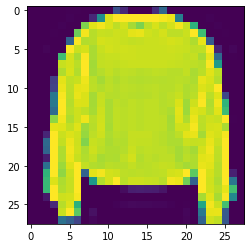

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
train_labels[7]

2

In [ ]:
# Create a small lists so we can index onto our training labels so they're human-readable
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]


Text(0.5, 1.0, 'T-shirt/top')

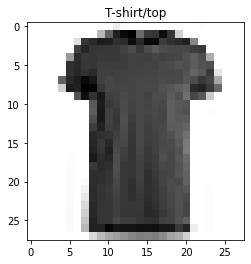

In [ ]:
# Plot an example with its label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

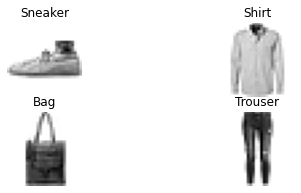

In [ ]:
# Plot multiple random image of fashion MNIST
import random
plt.figure(figsize=(7,3))
for i in range(4):
  ax= plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)



In [ ]:
# Building a multi-class classification modell

tf.random.set_seed(42)

img_model = tf.keras.Sequential([
                                 tf.keras.layers.Flatten(input_shape=(28,28)),
                                 tf.keras.layers.Dense(4, activation='relu'),
                                 tf.keras.layers.Dense(4, activation='relu'),
                                 tf.keras.layers.Dense(10, activation='softmax')
])

img_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

img_model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.1124 - accuracy: 0.1233 - val_loss: 2.2988 - val_accuracy: 0.1206
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2661 - accuracy: 0.1251 - val_loss: 2.2520 - val_accuracy: 0.1305
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2264 - accuracy: 0.1400 - val_loss: 2.2131 - val_accuracy: 0.1437
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0540 - accuracy: 0.1914 - val_loss: 1.9066 - val_accuracy: 0.2207
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8519 - accuracy: 0.2264 - val_loss: 1.8345 - val_accuracy: 0.2375
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7790 - accuracy: 0.2423 - val_loss: 1.7637 - val_accuracy: 0.2515
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7212 - accuracy: 0.2642 - val_loss: 1.7164 - val_accuracy:

In [ ]:
img_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 3140      
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check the min and max values of train data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Neural networks prefer data to be the normalized

#WE can get our training and testing data between 0 and zero by dividing them by max

train_data_norm =train_data/255.0
test_data_norm = test_data/255.0

#Check the min and max values of the scaled training data
train_data_norm.max()

1.0

In [ ]:
# Let's use normalized data in our new model

tf.random.set_seed(42)

img_model_2 = tf.keras.Sequential([
                                 tf.keras.layers.Flatten(input_shape=(28,28)),
                                 tf.keras.layers.Dense(16, activation='relu'),
                                 tf.keras.layers.Dense(16, activation='relu'),
                                 tf.keras.layers.Dense(10, activation='softmax')
])

img_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

img_model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1578 - accuracy: 0.6283 - val_loss: 0.7253 - val_accuracy: 0.7570
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6321 - accuracy: 0.7906 - val_loss: 0.6038 - val_accuracy: 0.8007
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5503 - accuracy: 0.8158 - val_loss: 0.5549 - val_accuracy: 0.8124
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5106 - accuracy: 0.8277 - val_loss: 0.5240 - val_accuracy: 0.8249
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4862 - accuracy: 0.8353 - val_loss: 0.5083 - val_accuracy: 0.8244
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4684 - accuracy: 0.8406 - val_loss: 0.4946 - val_accuracy: 0.8291
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4554 - accuracy: 0.8435 - val_loss: 0.4827 - val_accuracy:

In [ ]:
# finding the ideal learning rate

#set the random seed
tf.random.set_seed(42)

# create the model
model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax'),

])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))


#fit the model
find_lr_history= model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018


In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Findig ideal learning rate")
plt.show()

In [ ]:
# so let's refit the model with ideal learning rate

tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax'),
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

In [ ]:
#Evaluating our multiclass classification model

# Evaluate its performance using other classification matrics such as a confusion matrics
# Assess some of its predictions (through visualizations)
# Improve its results (by training it for longer or changing the architecture)
# Save and export if for use in an application


In [ ]:
# let's go through top 2

#Create a confusion metrics

#finding predictions
from random import randrange

image_pred= model_14.predict(test_data_norm)
rounded_value=tf.round(image_pred)
squeezed_dimension=list(tf.squeeze(rounded_value))
count=0
predicted_final_array=[]
for x in range(len(squeezed_dimension)):
  if(1 in list(squeezed_dimension[x])):
    predicted_final_array.append(list(squeezed_dimension[x]).index(1))
  else:
    predicted_final_array.append(randrange(10))
  


predicted_final_array


# test_labels

# tf.math.confusion_matrix(
#     labels, predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,
#     name=None
# )

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(list(tf.squeeze(test_labels)), predicted_final_array)

import seaborn as sn
plt.matshow(cm, cmap='binary')
sn.heatmap(cm, annot=False, cmap=plt.cm.Blues)


In [ ]:
#Darker regions means tshirt, shoes and all the total 9 items, very light darker are actually errors

In [ ]:
# #how about we create a fun little function for:
# plot a random image
# make a prediction on said image
# label the plot with the truth label and predicted label


In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  #set up random integer
  i= random.randint(0, len(images))

  # Create predictions and targets
  target_image =images[i]
  pred_probs= model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap= plt.cm.binary)

  #Change the color of the titles depending on if the prediction is right or wrong 
  if pred_label ==true_label:
    color = "green"
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(pred_label, 
                                                 100*tf.reduce_max(pred_probs),
                                                 true_labels),
             color=color)
  


In [ ]:
# check out the random image as well as its prediction
plot_random_image(model_14, test_data_norm, test_labels, class_names)

In [ ]:
model_14.layers[1]

In [ ]:
# Get the patterns of layers in our network
weights, biases  = model_14.layers[1].get_weights()

weights, weights.shape

In [ ]:
#Bias and bias shapes
biases, biases.shape

In [ ]:
# Let's check our another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)